In [1]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import skimage
from datetime import datetime
from IPython.display import clear_output
import sys
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import geopandas
import os
import random
from datetime import datetime
import time
import pytz
import shutil
from suntime import Sun
from datetime import timedelta
from datetime import date
sys.path.insert(1, './scripts')
from plot_no_coords import *
from solar_info import *
from helper_functions import *
import math
import pickle
import random
import os
sys.path.insert(1, './scripts')
from sza import get_sza
with open('/projects/mecr8410/SmokeViz_code/deep_learning/dataset_pointers/large/large.pkl', 'rb') as handle:
    data_dict = pickle.load(handle)

from pyorbital import astronomy

## Display imagery with time difference between sample and sunrise/set

This is useful when you want to find an example for that will show a stark difference between GOES-EAST and WEST

In [2]:
truth_fns = data_dict['test']['truth']
random.shuffle(truth_fns)

G16_s20222912330203_50.73_-127.72_101.tif


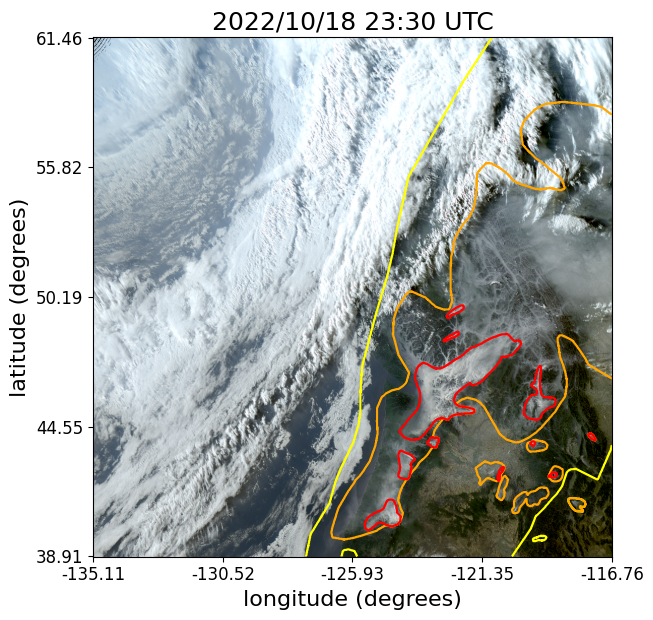

sunrise diff:  8:31:32
sunset diff:   2:00:16
solar zenith West:    62.03329456561419
solar zenith middle:  73.76764518518404
solar zenith East:    84.97171914244693
G16_s20221102130203_18.34_-101.98_152.tif


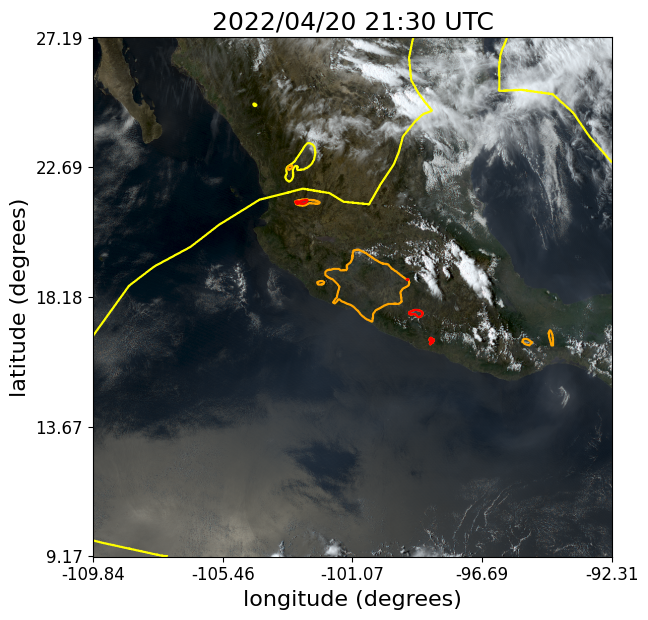

sunrise diff:  9:02:08
sunset diff:   3:35:40
solar zenith West:    32.566640383544936
solar zenith middle:  39.94937587620399
solar zenith East:    49.742098361952664
G16_s20220552200204_30.32_-79.76_70.tif


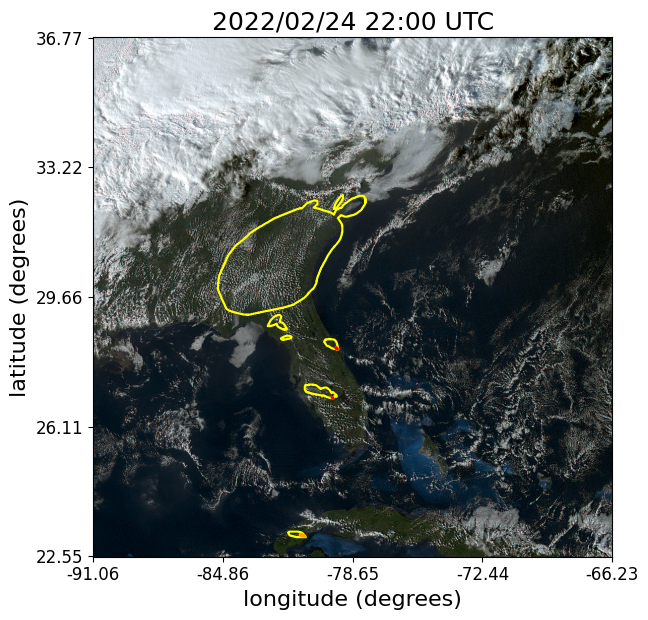

sunrise diff:  10:09:20
sunset diff:   1:13:28
solar zenith West:    63.13353366177002
solar zenith middle:  75.42442170638132
solar zenith East:    88.06114506903499
G16_s20222122330206_44.39_-116.12_17.tif


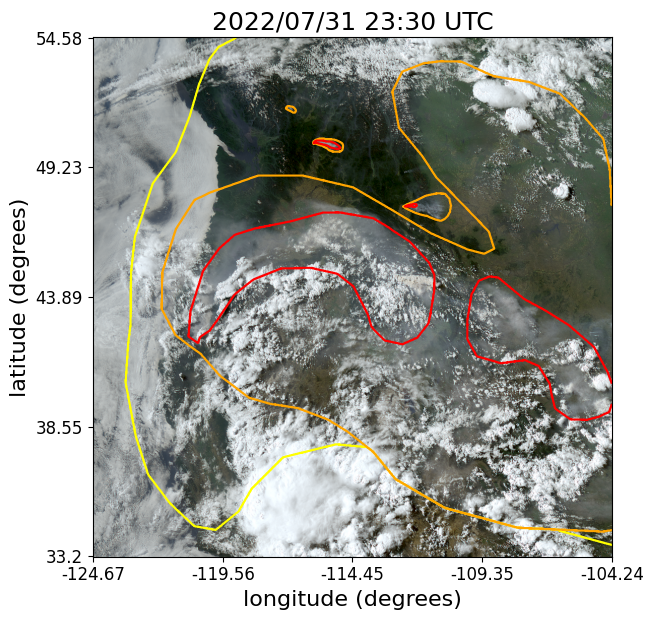

sunrise diff:  10:59:44
sunset diff:   3:39:16
solar zenith West:    44.00325930451009
solar zenith middle:  52.55379045502828
solar zenith East:    61.9390899394804
G16_s20222980030206_35.52_-120.38_75.tif


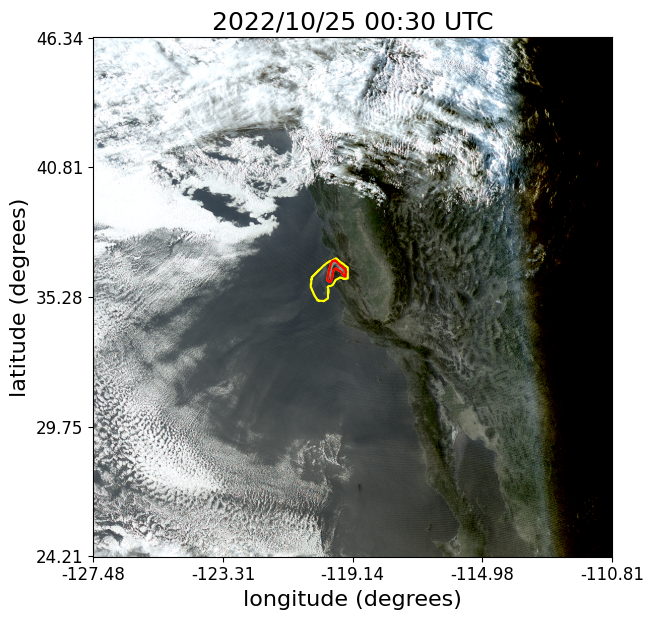

sunrise diff:  10:14:08
sunset diff:   0:43:28
solar zenith West:    72.26292776547571
solar zenith middle:  82.18435597663209
solar zenith East:    92.40556822819634


In [4]:
density = 'Heavy' #'Light' 'Medium'
num_imgs = 5 #len(data_dict['test']['truth'])
num = 0
#truth_fns = random.choices(data_dict['test']['truth'], k=num_imgs)
for truth_fn in truth_fns:
    if density in truth_fn:
        fn = truth_fn.split('/')[-1]
        dt = get_dt_from_fn(fn)
        lat, lon = get_center_lat_lon(fn)
        lat, lon = float(lat), float(lon)

        print(fn)
        plot_densities_from_processed_data(fn, data_loc="/scratch/alpine/mecr8410/semantic_segmentation_smoke/large/")

        try:
            sr, ss = get_sunrise_sunset(dt, lat, lon)
        except:
            pass
        
        get_sza(lat, lon, dt, res=2000, img_size=1024)                   
        num+=1
        if num >= num_imgs:
            break